# Exploración y evaluación de los datos

### Base 1: bank_transactions.csv

In [8]:
# se importan las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Se carga la data
data_bank = pd.read_csv('BankTransactions/bank_transactions.csv')
data_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [25]:
print(data_bank.shape)
data_bank.info()

(1048567, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Hasta el momento tenemos un dataframe con 1,048,567 registros y 9 columnas. Algunas variables no están en el formato adecuado y algunos datos del cliente están vacíos. En la transformación se debe cambia el formato *object* de las variables **CustomerDOB** y **TransactionDate** al formato adecuado de fecha.

In [30]:
# Se cambian formatos de fecha para evaluar mejor la data. 
data_bank['TransactionDate'] = pd.to_datetime(data_bank['TransactionDate'], format='%d/%m/%y')
data_bank['CustomerDOB'] = pd.to_datetime(data_bank['CustomerDOB'], format='%d/%m/%y', errors='coerce') # con errors='coerce' se reemplazan los valores nulos por nan

In [31]:
data_bank['TransactionDate'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_18792\4099057514.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_bank['TransactionDate'].describe()


count                 1048567
unique                     55
top       2016-08-07 00:00:00
freq                    27261
first     2016-08-01 00:00:00
last      2016-10-21 00:00:00
Name: TransactionDate, dtype: object

Text(0, 0.5, '# Transaction')

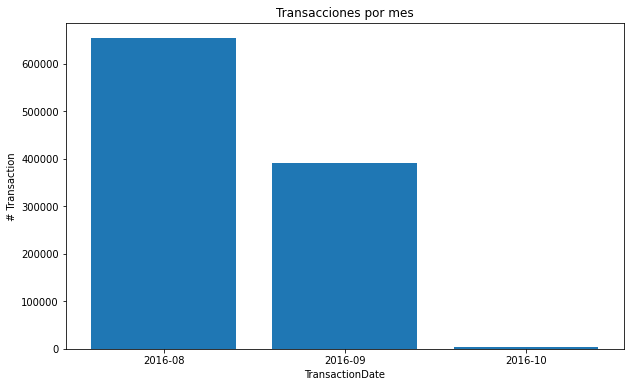

In [35]:
x_values = data_bank['TransactionDate'].sort_values().dt.strftime("%Y-%m").unique()
y_values = data_bank['TransactionDate'].dt.strftime("%Y-%m").value_counts().tolist()

plt.figure(figsize=(10,6))    
plt.bar(x_values, y_values)         
plt.title('Transacciones por mes')     
ax = plt.subplot()                   
ax.set_xticks(x_values)           
ax.set_xticklabels(x_values)     
ax.set_xlabel('TransactionDate') 
ax.set_ylabel('# Transaction')  

Se tiene registro de transacciones durante el año 2016 entre agosto y octubre y el día que más transacciones se hicieron fue en 2016-08-07 y agosto es el mes con el mayor número de transacciones

In [61]:
data_bank['CustomerDOB'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_18792\2572560662.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_bank['CustomerDOB'].describe()


count                  987831
unique                  17253
top       1989-01-01 00:00:00
freq                      809
first     1969-01-01 00:00:00
last      2068-12-31 00:00:00
Name: CustomerDOB, dtype: object

Se encuentran valores de fechas de nacimiento recientes y/o futuras lo cual es una inconsistencia. En la transformación se podrían omitir estos valores inconsistentes reemplazandolos con NAN y evaluar los rangos de edad de únicamente los clientes que tienen una fecha de nacimiento correcta. 

In [31]:
print(data_bank['CustomerID'].value_counts().count())
print(data_bank['CustomerID'].value_counts().mean())

884265
1.1858062911005185


Se tiene un total de 884,265 clientes único, lo que quiere decir que en promedio un cliente hace 1.18 transacciones.


### Base 2: Music_info.csv y User_Listening_History.csv

In [37]:
# Se carga la data
music_info = pd.read_csv('SongDatase/Music_Info.csv')
user_listening = pd.read_csv('SongDatase/User_Listening_History.csv')
music_info.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [38]:
user_listening.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [39]:
music_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

En esta base de datos se tienen 50,683 canciones con 21 columnas, solo los campos 'tags' y 'genre' tienen valores nulos. Los campos tienen un formato correcto

In [40]:
user_listening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


Este dataframe contiene 9,711,301 registros de canciones y usuarios. Los formatos son los adecuados. No hay valores nulos.
Estos dos dataframe se pueden cruzar entre si por la variable 'track_id' que identifica la canción.

In [41]:
music_info['track_id'].describe()

count                  50683
unique                 50683
top       TRIOREW128F424EAF0
freq                       1
Name: track_id, dtype: object

In [42]:
user_listening['track_id'].describe()

count                9711301
unique                 30459
top       TRONYHY128F92C9D11
freq                   80656
Name: track_id, dtype: object

En el dataframe user_listening tenemos un total de 30,459 canciones únicas. ¿Será que todas coinciden con music_info? Para responder esta pregunta, podemos hacer un merge entre los dos dataframe y evaluar si todos los track_id cruzan.

In [45]:
df_new = pd.merge(  user_listening,music_info,
                    how='inner',
                    on ='track_id')

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9711301 entries, 0 to 9711300
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   track_id             object 
 1   user_id              object 
 2   playcount            int64  
 3   name                 object 
 4   artist               object 
 5   spotify_preview_url  object 
 6   spotify_id           object 
 7   tags                 object 
 8   genre                object 
 9   year                 int64  
 10  duration_ms          int64  
 11  danceability         float64
 12  energy               float64
 13  key                  int64  
 14  loudness             float64
 15  mode                 int64  
 16  speechiness          float64
 17  acousticness         float64
 18  instrumentalness     float64
 19  liveness             float64
 20  valence              float64
 21  tempo                float64
 22  time_signature       int64  
dtypes: float64(9), int64(6), object(

Al hacer merge entre los dataframe por inner join se observa que no se pierden registros por lo que tenemos la información necesaria para seguir trabajando.

In [47]:
df_new.describe()

,playcount,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06
mean,2.630946e+00,2.004846e+03,2.458999e+05,5.286417e-01,6.781073e-01,5.351573e+00,-7.825038e+00,6.474253e-01,7.136620e-02,2.206536e-01,1.679303e-01,2.047823e-01,4.658363e-01,1.234290e+02,3.913533e+00
std,5.706324e+00,7.017311e+00,9.017579e+04,1.708274e-01,2.362942e-01,3.556024e+00,3.952011e+00,4.777717e-01,7.312056e-02,2.971524e-01,2.992913e-01,1.686200e-01,2.508728e-01,2.907696e+01,3.601450e-01
min,1.000000e+00,1.900000e+03,1.439000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.002000e+03,1.979460e+05,4.130000e-01,5.230000e-01,2.000000e+00,-9.623000e+00,0.000000e+00,3.350000e-02,4.230000e-03,3.830000e-06,9.750000e-02,2.620000e-01,1.008950e+02,4.000000e+00
50%,1.000000e+00,2.007000e+03,2.335730e+05,5.320000e-01,7.250000e-01,5.000000e+00,-6.919000e+00,1.000000e+00,4.440000e-02,6.110000e-02,1.140000e-03,1.330000e-01,4.420000e-01,1.218570e+02,4.000000e+00
75%,2.000000e+00,2.009000e+03,2.750400e+05,6.480000e-01,8.810000e-01,9.000000e+00,-5.089000e+00,1.000000e+00,7.450000e-02,3.430000e-01,1.540000e-01,2.760000e-01,6.710000e-01,1.420110e+02,4.000000e+00
max,2.948000e+03,2.020000e+03,2.510920e+06,9.860000e-01,1.000000e+00,1.100000e+01,3.642000e+00,1.000000e+00,9.540000e-01,9.960000e-01,9.990000e-01,9.980000e-01,9.890000e-01,2.388950e+02,5.000000e+00


In [56]:
def top_10(df,valor):
    """ Función para calcular el top 10 en reproducciones

    Args:
        df: base de datos de donde se desea sacar el top 10
        valor: categoría por la que se desea sacar el top 10

    Returns:
        df : dataframe con los primero 10 registros con mayor cantidad de reproducciones
    """
    top = df.groupby(valor)['playcount'].sum().sort_values(ascending=False).head(10)
    return top



In [57]:
# Artistas más escuchados
top_10(df_new,'artist')

artist
Kings of Leon     597299
The Black Keys    336178
Justin Bieber     231001
Coldplay          203320
Radiohead         179341
Jack Johnson      177147
Modest Mouse      174356
Metallica         166320
John Mayer        160425
Metric            159881
Name: playcount, dtype: int64

In [58]:
# Canciones más escuchadas
top_10(df_new,'name')

name
Revelry                  527893
Alejandro                111615
Gears                    111596
Halo                      91461
Bring Me To Life          91448
Heartbreak Warfare        87745
Uprising                  87050
Float On                  85079
Party In The U.S.A.       78443
Bitter Sweet Symphony     76893
Name: playcount, dtype: int64

In [59]:
# Generos más escuchados
top_10(df_new,'genre')

genre
Rock          8808231
Electronic    1975595
Pop           1484501
Rap            891687
Metal          846604
Country        697086
Folk           389822
RnB            363087
Reggae         191751
Jazz           188157
Name: playcount, dtype: int64